## Classification Challenge (My Contribution)

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.

Import relevant libraries

In [36]:
#for dataframe manipulation
import pandas as pd

#for numerical and vectorial computation 
import numpy as np

#for visualization
import seaborn as sns
import scipy as sip
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import statsmodels.api as sm

#for model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
!pip install category_encoders
import category_encoders as CE

#for pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

#for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

!pip install featuretools
import featuretools as ft
!pip install optuna
import optuna

#for system settings
import warnings
import os
import joblib

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()
pd.options.display.float_format = '{:.2f}'.format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 9.4 MB/s 
     |████████████████████████████████| 209 kB 64.3 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 146 kB 57.6 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 112 kB 56.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=f18e238297d5fdae4d52a732139c3b7fea50cbbff73cc8f23b5ebb8adf659d40
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


Review the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the data
data = pd.read_csv('/content/drive/MyDrive/Classification_Challenge/wine.csv')

#view the head of the dataset
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


## Satatistical Summaries

In [4]:
data.describe(include='all')

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [ ]:
data.nunique()

Alcohol                       126
Malic_acid                    133
Ash                            79
Alcalinity                     63
Magnesium                      53
Phenols                        97
Flavanoids                    132
Nonflavanoids                  39
Proanthocyanins               101
Color_intensity               132
Hue                            78
OD280_315_of_diluted_wines    122
Proline                       121
WineVariety                     3
dtype: int64

178 entries of observation was made for each features

In [ ]:
data.shape

(178, 14)

The dataset is quite small (178 number of samples) and also clean with no redundancies and anomalies. Hence, a simple machine learning classification model is required.

In [ ]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety'],
      dtype='object')

In [5]:
# Define the features and the label (classification)
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']
labels = ['WineVariety']


EDA

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

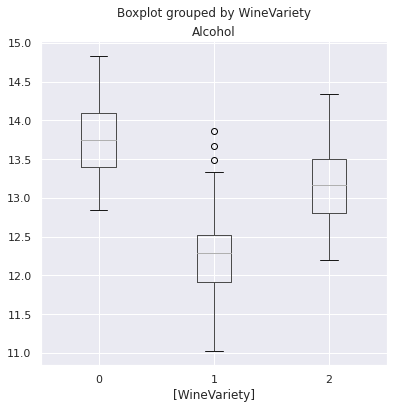

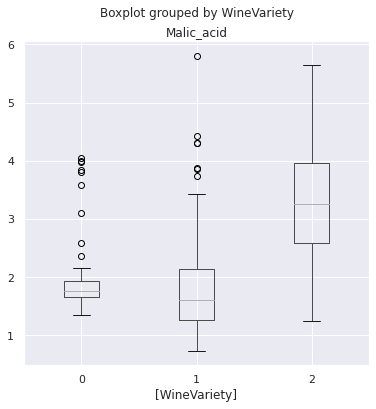

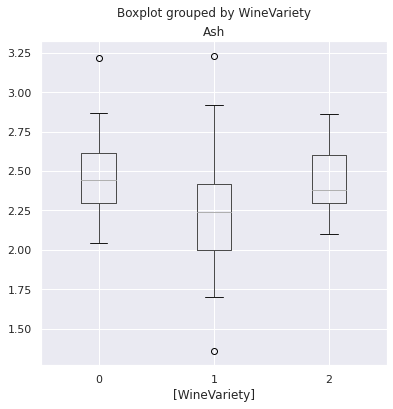

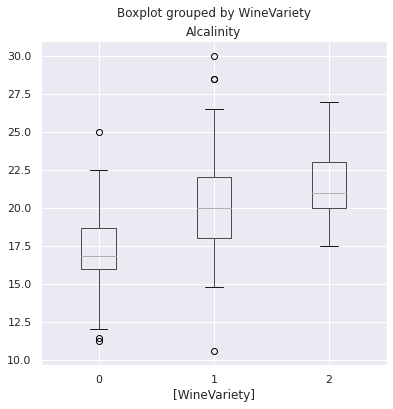

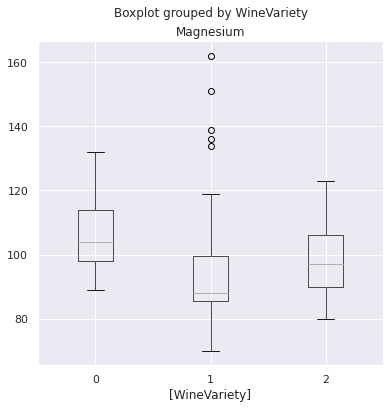

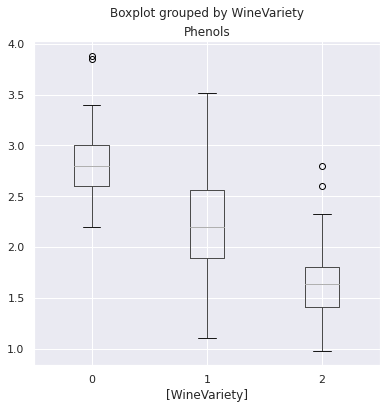

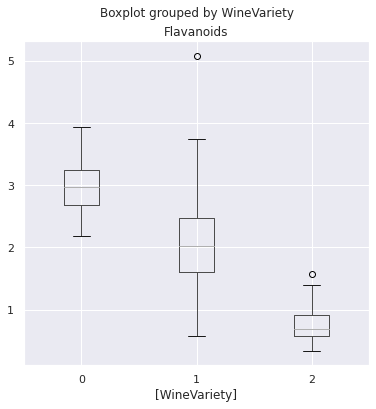

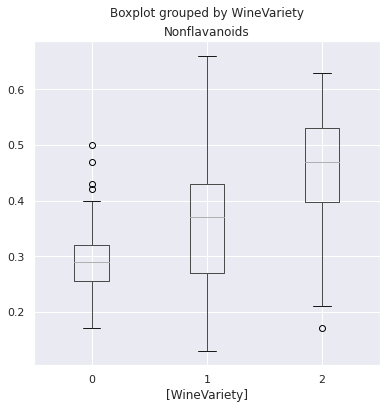

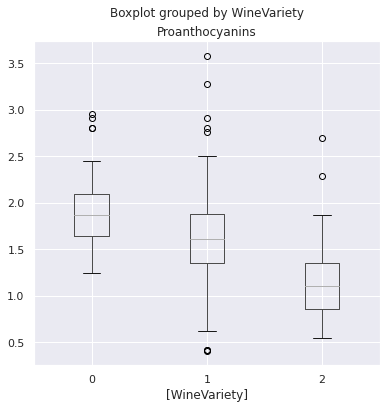

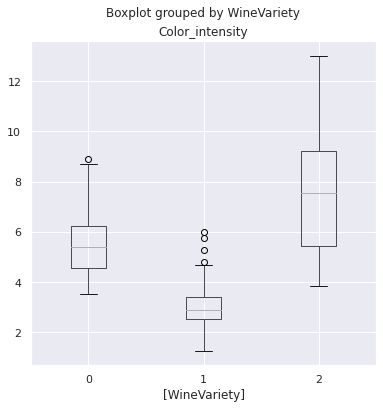

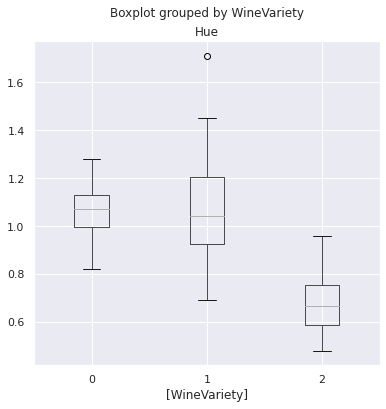

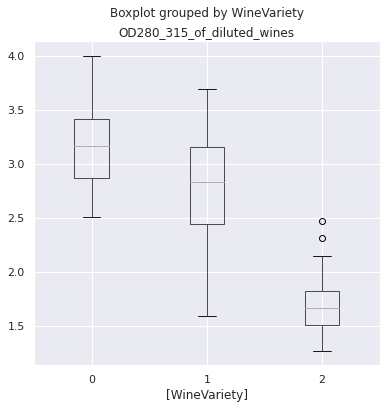

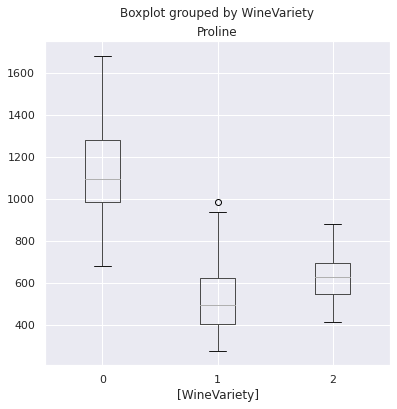

In [ ]:
# Compare the feature distribution
for col in features:
    data.boxplot(column=col, by=labels, figsize=(6,6))
    plt.title(col)
plt.show()

All features are significant in the predictive process

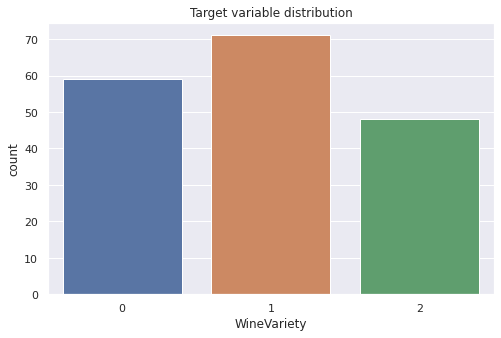

In [ ]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data["WineVariety"])
plt.title('Target variable distribution')
plt.show()

The class labels has a normal distribution

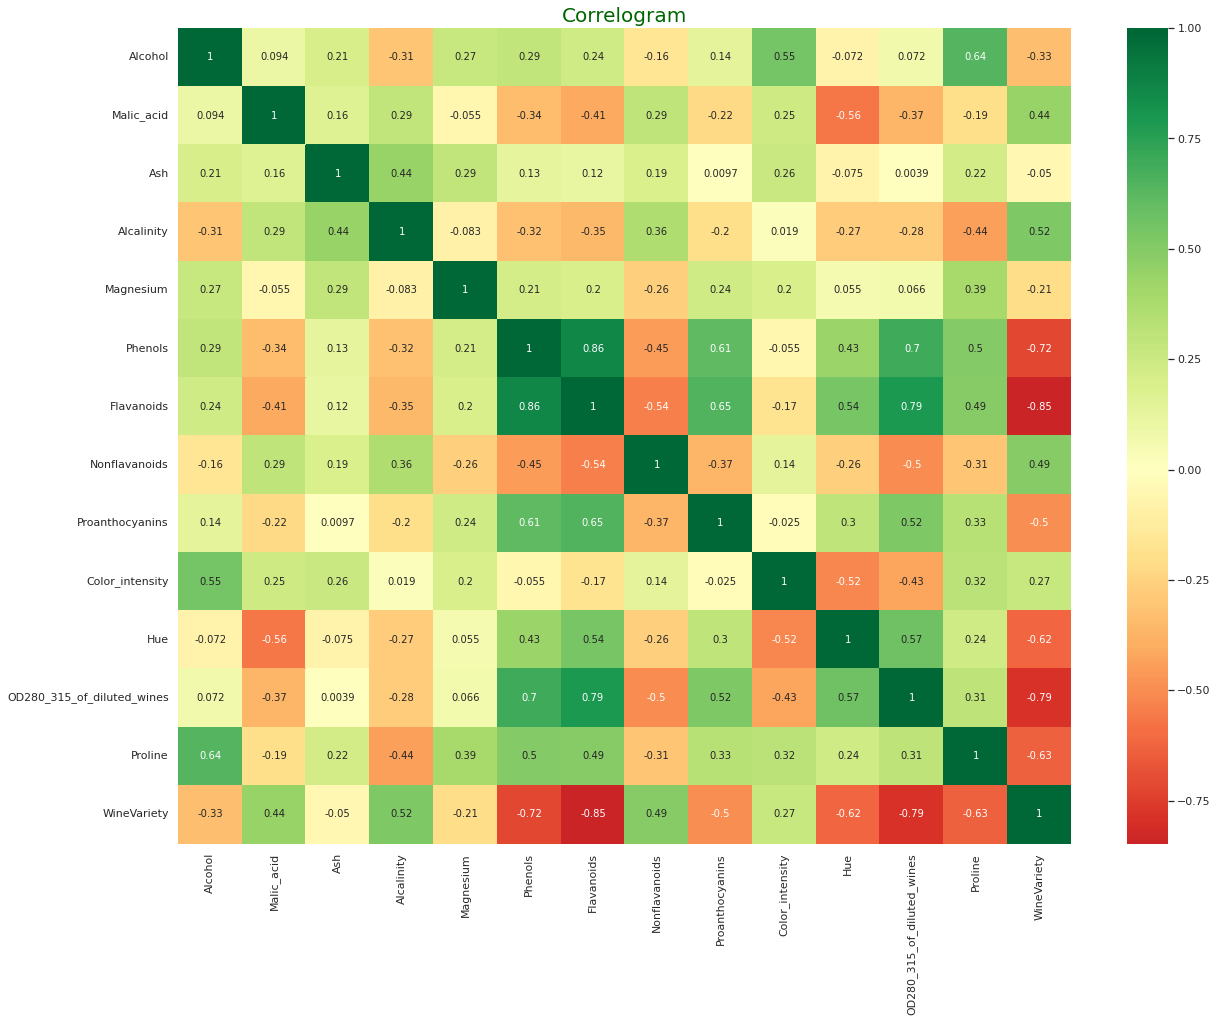

In [ ]:
# Quantify correlations
corr = data.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 20, color = 'darkgreen')
plt.show()

In [ ]:
#checking corellation with resoect to the target
data.corr()['WineVariety']

Alcohol                      -0.328222
Malic_acid                    0.437776
Ash                          -0.049643
Alcalinity                    0.517859
Magnesium                    -0.209179
Phenols                      -0.719163
Flavanoids                   -0.847498
Nonflavanoids                 0.489109
Proanthocyanins              -0.499130
Color_intensity               0.265668
Hue                          -0.617369
OD280_315_of_diluted_wines   -0.788230
Proline                      -0.633717
WineVariety                   1.000000
Name: WineVariety, dtype: float64

Most features has negative corellation with the target class.

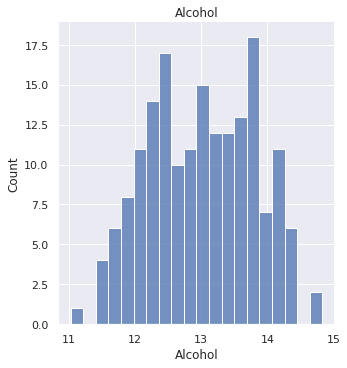

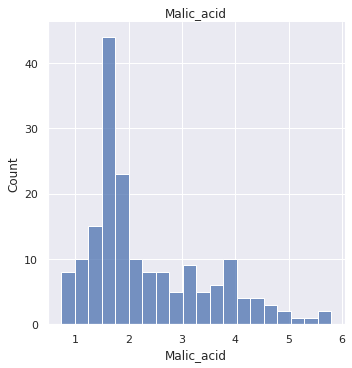

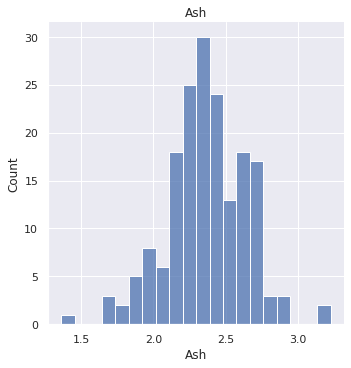

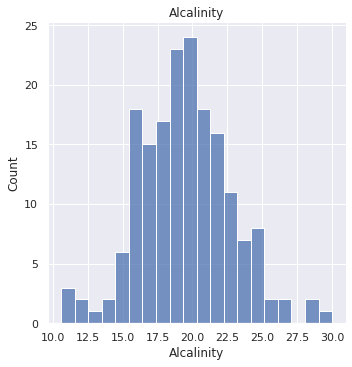

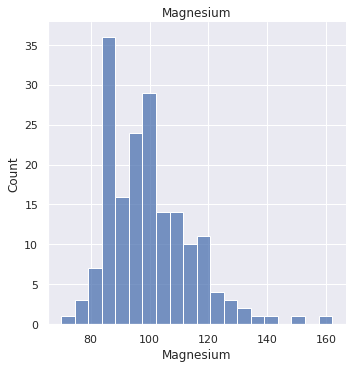

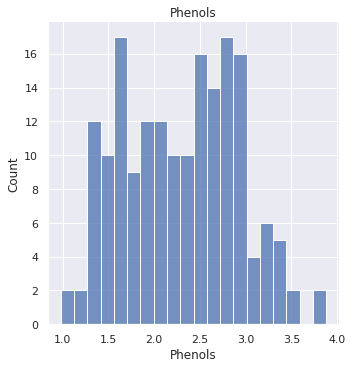

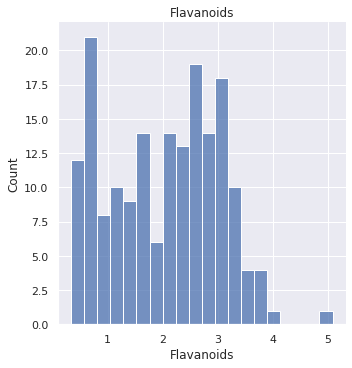

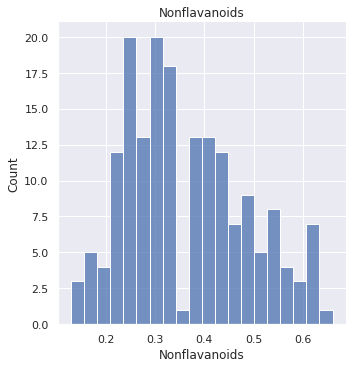

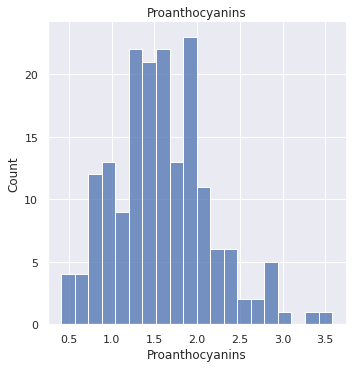

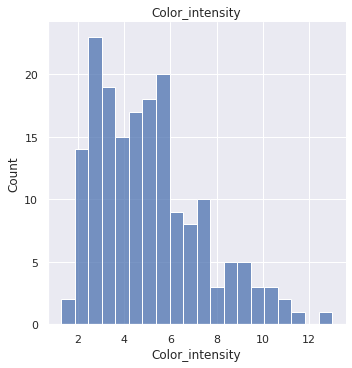

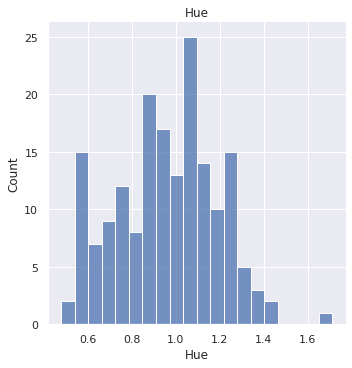

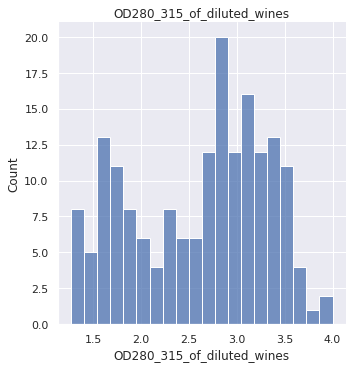

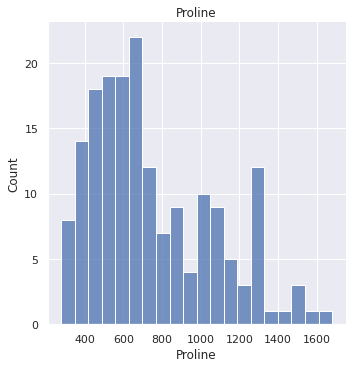

In [ ]:
#see distribution
for col in features:
    sns.displot(x = data[col],bins=20)
    plt.title(col)
plt.show()

In [ ]:
#finding the number of outliers for each feature
for col in features:
  data_out = data[data[col]>data[col].quantile(0.99)].shape[0]
  print('Number of outliers in',col, 'is',data_out)

Number of outliers in Alcohol is 2
Number of outliers in Malic_acid is 2
Number of outliers in Ash is 2
Number of outliers in Alcalinity is 1
Number of outliers in Magnesium is 2
Number of outliers in Phenols is 2
Number of outliers in Flavanoids is 2
Number of outliers in Nonflavanoids is 1
Number of outliers in Proanthocyanins is 2
Number of outliers in Color_intensity is 2
Number of outliers in Hue is 2
Number of outliers in OD280_315_of_diluted_wines is 2
Number of outliers in Proline is 2


A 1/2 outliers in a 178 samples dataset does not have a signiicance.

I suggest it should be ignored 

In [14]:
# binning the noflavanoid feature column
data['non_flavanoid'] = pd.cut(data['Nonflavanoids'], bins=3, labels=["Low", "Mid", "High"])
# encoding as a oridnal data
#data['non_flavanoid'] = CE.OrdinalEncoder.fit_transform(X=data['non_flavanoid'])
OE = OrdinalEncoder()
cat_feat = ['non_flavanoid']
ceo = CE.OrdinalEncoder(cols = cat_feat) 
data = ceo.fit_transform(data)

In [15]:
# Splitting the data set into a training and validation/test set
data.shape

(178, 15)

In [16]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety',
       'non_flavanoid'],
      dtype='object')

In [ ]:
#Automated feature engineering
#es = ft.EntitySet(id='Alcohols')
#es = es.entity_from_dataframe(dataframe = data,
           #variable_types = { "Alcohol": ft.variable_types.Numeric, 
                             #"Malic_acid": ft.variable_types.Numeric,
                             #"Ash": ft.variable_types.Numeric,
                             #"Alcalinity": ft.variable_types.Numeric,
                             #"Magnesium": ft.variable_types.Numeric,
                             #'Phenols': ft.variable_types.Numeric,
                             #'Flavanoids': ft.variable_types.Numeric,
                             #'Nonfalavanoids': ft.variable_types.Numeric,
                             #'Proanthocyanins': ft.variable_types.Numeric,
                             #'Proline':ft.variable_types.Numeric,
                             #}) 

In [ ]:
train = data.loc[:124,:]
test = data.loc[125:,:]

# view the datasets shapes
print(train.shape,test.shape)

(125, 15) (53, 15)


Machine Learning Pipeline and Algorithm

In [18]:
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
            'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
            'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'non_flavanoid']
labels = ['WineVariety']

In [19]:
X = data[features]
y = data[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
## define preprocessing for numeric features(scale them)
numeric_features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


## define preprocessing for categorical features(encode them)
categorical_features = ['non_flavanoid']
categorical_transformer = Pipeline(steps=[
    ('label', OrdinalEncoder())])


## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
LRmodel = pipeline.fit(X_train, y_train)
print (LRmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Alcohol', 'Malic_acid',
                                                   'Ash', 'Alcalinity',
                                                   'Magnesium', 'Phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoids',
                                                   'Proanthocyanins',
                                                   'Color_intensity', 'Hue',
                                                   'OD280_315_of_diluted_wines',
                                                   'Proline']),
                                                 ('cat',
                                        

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


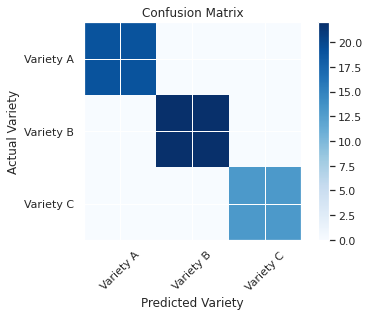

In [ ]:
# Get predictions from test data
LRpredictions = LRmodel.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, LRpredictions))
print("Overall Precision:",precision_score(y_test, LRpredictions, average='macro'))
print("Overall Recall:",recall_score(y_test, LRpredictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, LRpredictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

RandomForestClassifier 

In [ ]:
# Define preprocessing for numeric columns (scale them)
feature_columns = []
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
RFmodel = pipeline.fit(X_train, y_train)
print (RFmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 3, 4, 6, 9, 12])])),
                ('classifier', RandomForestClassifier(random_state=0))])


Overall Accuracy: 0.9814814814814815
Overall Precision: 0.9761904761904763
Overall Recall: 0.9848484848484849


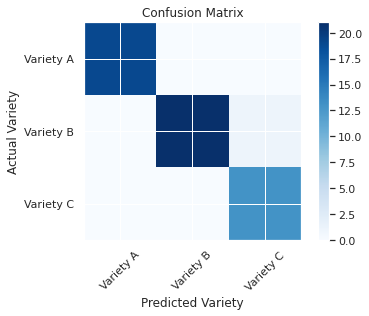

In [ ]:
# Get predictions from test data
RFCpredictions = RFmodel.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, RFCpredictions))
print("Overall Precision:",precision_score(y_test, RFCpredictions, average='macro'))
print("Overall Recall:",recall_score(y_test, RFCpredictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, RFCpredictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define preprocessing for numeric columns (scale them)
feature_columns = [0,3,4,6,9,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
DTCmodel = pipeline.fit(X_train, y_train)
print (DTCmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 3, 4, 6, 9, 12])])),
                ('classifier', DecisionTreeClassifier(random_state=0))])


Overall Accuracy: 0.9814814814814815
Overall Precision: 0.9761904761904763
Overall Recall: 0.9848484848484849


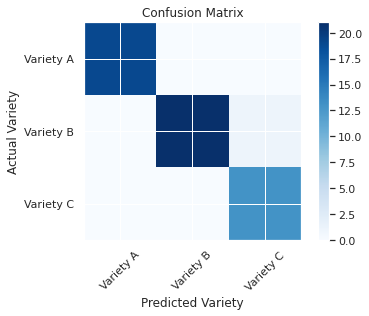

In [ ]:
# Get predictions from test data
DTCpredictions = DTCmodel.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, DTCpredictions))
print("Overall Precision:",precision_score(y_test, DTCpredictions, average='macro'))
print("Overall Recall:",recall_score(y_test, DTCpredictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, DTCpredictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

The challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

So far, LogisticRegression model has produced the best perfomance with an overall score of 0.95

Average AUC: 0.9985517771701983


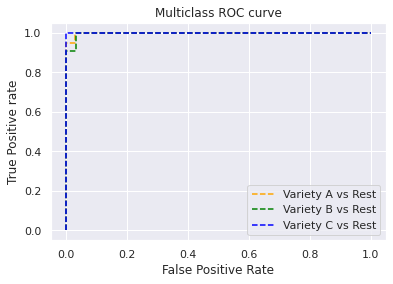

In [ ]:

# Get class probability scores
LRpredprob = LRmodel.predict_proba(X_test)

auc = roc_auc_score(y_test, LRpredprob , multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, LRpredprob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
to_drop

[]

In [35]:
# Initialize an empty array to hold feature importances
feature_importances_cbc = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = XGBClassifier(random_state=32)
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i,shuffle=True)
    
    # Train using early stopping
    model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], eval_metric = 'merror' , verbose = 200)
    
    # Record the feature importances
    feature_importances_cbc += model.feature_importances_

# Make sure to average feature importances! 
feature_importances_cbc = feature_importances_cbc / 2
feature_importances_cbc = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_cbc}).sort_values('importance', ascending = False)

[0]	validation_0-merror:0.066667
Will train until validation_0-merror hasn't improved in 100 rounds.
[99]	validation_0-merror:0.044444
[0]	validation_0-merror:0.044444
Will train until validation_0-merror hasn't improved in 100 rounds.
[99]	validation_0-merror:0.044444


In [28]:
# Find the features with zero importance
zero_features = list(feature_importances_cbc[feature_importances_cbc['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances_cbc.head(10)

There are 1 features with 0.0 importance


,feature,importance
11,OD280_315_of_diluted_wines,0.29
9,Color_intensity,0.17
12,Proline,0.15
6,Flavanoids,0.14
1,Malic_acid,0.06
5,Phenols,0.04
2,Ash,0.04
10,Hue,0.03
8,Proanthocyanins,0.02
0,Alcohol,0.02


In [29]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

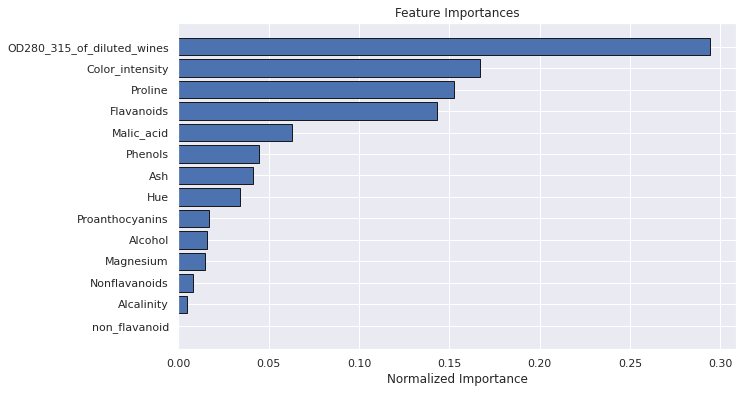

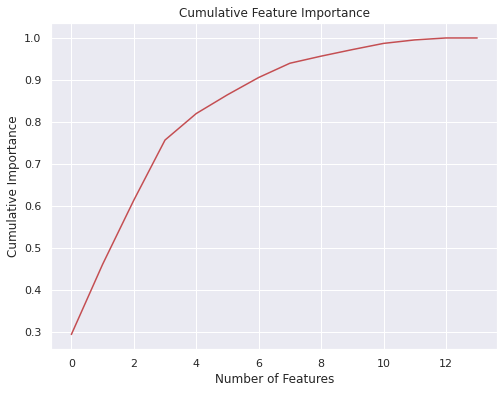

7 features required for 0.90 of cumulative importance


,index,feature,importance,importance_normalized,cumulative_importance
0,11,OD280_315_of_diluted_wines,0.29,0.29,0.29
1,9,Color_intensity,0.17,0.17,0.46
2,12,Proline,0.15,0.15,0.61
3,6,Flavanoids,0.14,0.14,0.76
4,1,Malic_acid,0.06,0.06,0.82
5,5,Phenols,0.04,0.04,0.86
6,2,Ash,0.04,0.04,0.91
7,10,Hue,0.03,0.03,0.94
8,8,Proanthocyanins,0.02,0.02,0.96
9,0,Alcohol,0.02,0.02,0.97


In [30]:
see_feature_importance = plot_feature_importances(feature_importances_cbc)
see_feature_importance

In [33]:
#trying another way with cross validation
cross_val_score(XGBClassifier(),X,y)

array([0.97222222, 0.91666667, 0.94444444, 0.97142857, 1.        ])

In [41]:
#searching for best hyperparamter
def objective(trial):
  oof_f1 = []
  oof_predictions = []

  param={}
  param['n_estimators'] = 10000
  param['min_child_samples'] = trial.suggest_int("min_child_samples",1,32)
  param['learning_rate'] = trial.suggest_float("learning_rate", 0.01, 0.3,log=True)
  param["max_depth"] =  9
  param["min_gain_to_split"] = trial.suggest_float("min_gain_to_split", 0, 1)
  param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)


  fold= StratifiedKFold(n_splits=5)
  i=1
  for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = XGBClassifier(**param,random_state=32)

    
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)
    oof_f1.append(roc_auc_score(y_test,preds))

  return np.mean(oof_f1)

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)
print(study.best_params)